# Requirements

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

# Load & Display Image

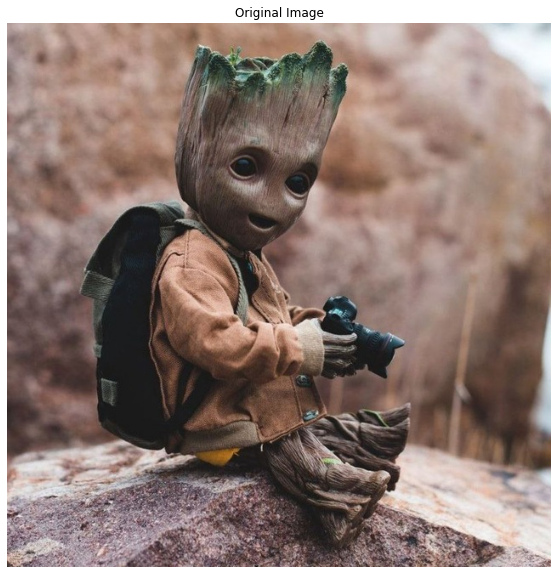

In [9]:

image_address = os.path.join("images", "photo_1.jpeg")

image = cv2.imread(image_address)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Creating Sketch

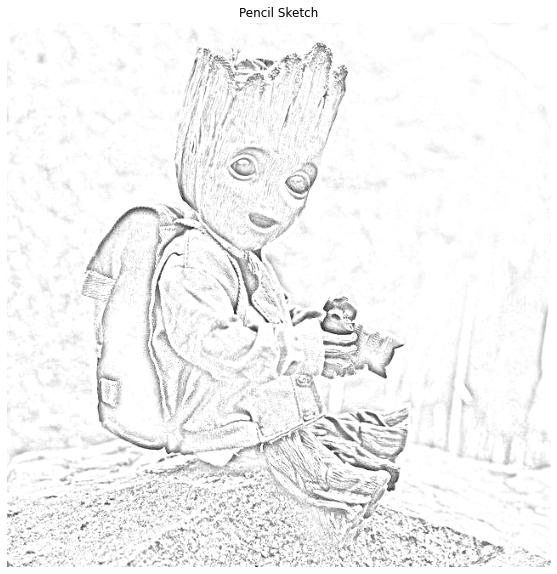

In [10]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

inverted_image = 255 - gray_image

blur_image = cv2.GaussianBlur(inverted_image, (21, 21), sigmaX=0, sigmaY=0)

inverted_blur = 255 - blur_image

sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

plt.figure(figsize=(10, 10))
plt.imshow(sketch, cmap="gray")
plt.title("Pencil Sketch")
plt.axis("off")
plt.show()


In [11]:
def rgb_to_sketch(image_rgb):
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    inverted = 255 - image_gray
    blurred = cv2.GaussianBlur(inverted, (21, 21), sigmaX=0, sigmaY=0)
    inverted_blurred = 255 - blurred
    sketch_img = cv2.divide(image_gray, inverted_blurred, scale=256.0)
    return sketch_img




# Sketching WebCam Video Stream in Real-time


In [ ]:
def sketch_webcam():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Could not open webcam.")
        return
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame.")
                break
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            sketch_frame = rgb_to_sketch(frame_rgb)
            cv2.imshow("Webcam Pencil Sketch", sketch_frame)
            if cv2.waitKey(1) == 27:
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()
sketch_webcam()


2025-06-02 04:13:47.079 python[49378:4187108] +[IMKClient subclass]: chose IMKClient_Legacy
2025-06-02 04:13:47.080 python[49378:4187108] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 

: 

# Sketching a Video in Real-time


In [ ]:
def sketch_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Could not open video: {video_path}")
        return
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("End of video or failed to grab frame.")
                break
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            sketch_frame = rgb_to_sketch(frame_rgb)
            cv2.imshow("Video Pencil Sketch", sketch_frame)
            if cv2.waitKey(1) == 27:
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()
sketch_video(os.path.join("videos", "Jobs_2.mp4"))

Could not open video: videos/Jobs_2.mp4


OpenCV: Couldn't read video stream from file "videos/Jobs_2.mp4"


: 